{'fx2': 1.5992339281090588, 'dH2': -4451.2530290676741, 'dH1': -67311.281552228305, 'K2': 263106.95425080898, 'K1': 7295.0207207253316, 'fx1': 0.24909656823357046}


/home/harmsm/Desktop/pytc/pytc/models.py:97: RuntimeWarning: invalid value encountered in sqrt
  PA = (b - np.sqrt((b)**2 - 4*P*self._A_total))/2


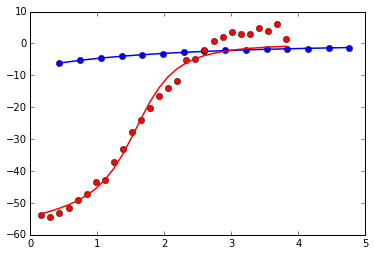

In [2]:
# Imports
import pytc
%matplotlib inline

# Set up the global fit with parameter guesses
fitter = pytc.GlobalFit({"K1":1e6,"dH1":-2000,"fx1":1.0,
                          "K2":1e6,"dH2":-2000,"fx2":1.0})

# Load in an experiment
e1 = pytc.ITCExperiment("test-data/hA5NCX1TESCaTCEP.DH",pytc.models.SingleSite)

# Associate the global K1 parameter with the local KA parameter, etc.
fitter.add_experiment(e1,{"K1":"KA",
                          "dH1":"dHA",
                          "fx1":"fx_comp"})

# Load in another experiment
e2 = pytc.ITCExperiment("test-data/hA5TESCaCon.DH",pytc.models.SingleSite)
fitter.add_experiment(e2,{"K2":"KA",
                          "dH2":"dHA",
                          "fx2":"fx_comp"})

# Do the global fit
fitter.fit()

# Plot the fit
fitter.plot()

# Print out the final fit parameters
print(fitter.fit_param)